In [1]:
from qiskit import *
from qiskit import QuantumCircuit
import numpy as np
from qiskit.quantum_info import Operator
from qclib.util import get_cnot_count
import matplotlib.pyplot as plt

In [2]:
pip install pylatexenc --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## testes

In [172]:
circuit = QuantumCircuit(3)

In [173]:
circuit.h(2)
circuit.cx(1,2)
circuit.tdg(2)
circuit.cx(0,2)
circuit.t(2)
circuit.cx(1,2)
circuit.tdg(2)
circuit.cx(0,2)
circuit.t(2)
circuit.h(2)
circuit.barrier()
circuit.t(1)
circuit.cx(0,1)
circuit.t(0)
circuit.tdg(1)
circuit.cx(0,1)

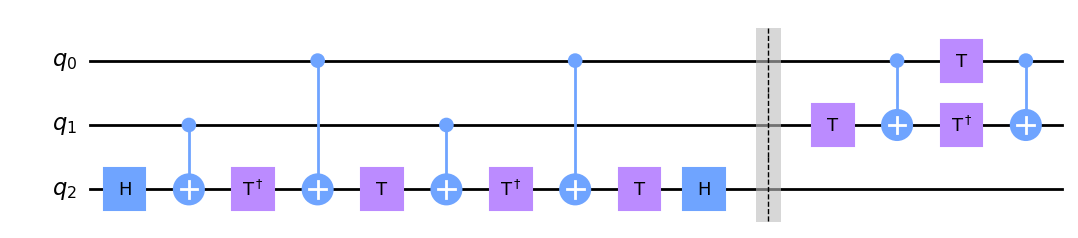

In [174]:
circuit.draw('mpl')

In [175]:
circuit2 = QuantumCircuit(3)
circuit2.ccx(0,1,2)

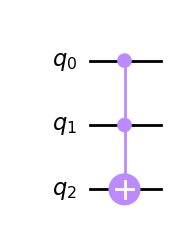

In [176]:
circuit2.draw('mpl')

In [177]:
circuit_op = Operator(circuit).data
circuit2_op = Operator(circuit2).data
np.allclose(circuit_op, circuit2_op)

True

## Teste multi-target 2 targets

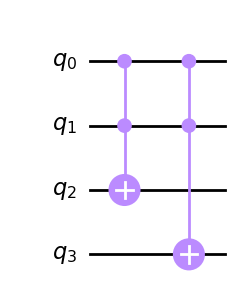

In [3]:
circuit1_mt = QuantumCircuit(4)
circuit1_mt.ccx(0,1,2)
circuit1_mt.ccx(0,1,3)
circuit1_mt.draw('mpl')

In [9]:
circuit2_mt = QuantumCircuit(4)

circuit2_mt.cx(2,3)
circuit2_mt.h(2)
circuit2_mt.cx(1,2)
circuit2_mt.tdg(2)
circuit2_mt.cx(0,2)
circuit2_mt.t(2)
circuit2_mt.cx(1,2)
circuit2_mt.tdg(2)
circuit2_mt.cx(0,2)
circuit2_mt.t(2)
circuit2_mt.h(2)
circuit2_mt.cx(2,3)

circuit2_mt.barrier()

circuit2_mt.t(1)
circuit2_mt.cx(0,1)
circuit2_mt.t(0)
circuit2_mt.tdg(1)
circuit2_mt.cx(0,1)



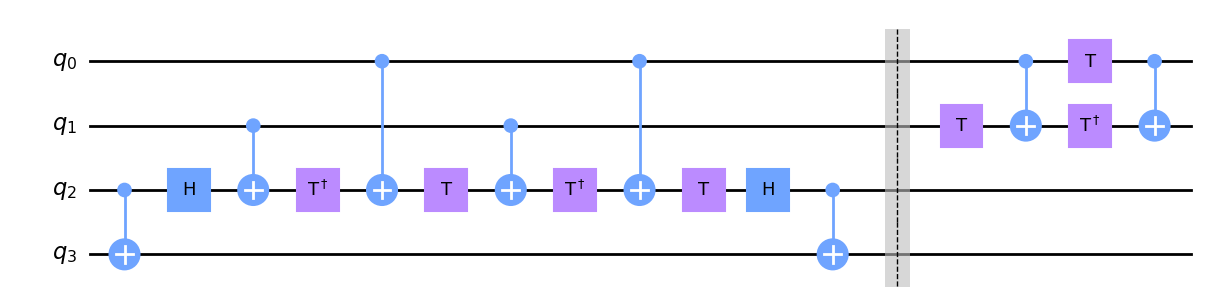

In [10]:
circuit2_mt.draw('mpl')

In [12]:
circuit1_mt_op = Operator(circuit1_mt).data
circuit2_mt_op = Operator(circuit2_mt).data

In [13]:
np.allclose(circuit1_mt_op, circuit2_mt_op)

True

## implementação

In [23]:
def toffoli_multi_target(num_targets):

    size = 2 + num_targets
    circuit = QuantumCircuit(size)

    for i in range(num_targets - 1):
        circuit.cx(size - i - 2, size - i - 1)

    circuit.h(2)
    circuit.cx(1,2)
    circuit.tdg(2)
    circuit.cx(0,2)
    circuit.t(2)
    circuit.cx(1,2)
    circuit.tdg(2)
    circuit.cx(0,2)
    circuit.t(2)
    circuit.h(2)

    for i in range(num_targets - 1):
        circuit.cx(i + 2, i + 3)

    circuit.barrier()

    circuit.t(1)
    circuit.cx(0,1)
    circuit.t(0)
    circuit.tdg(1)
    circuit.cx(0,1)

    return circuit

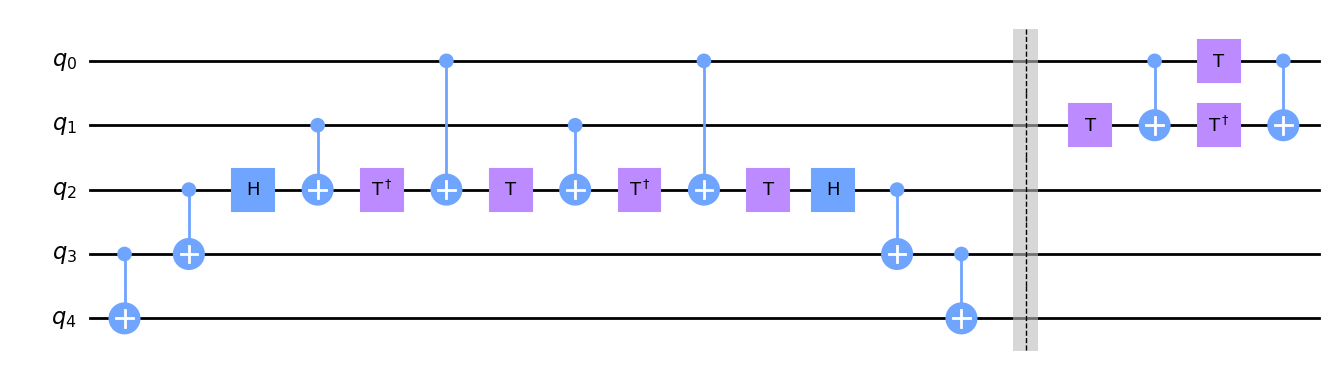

In [27]:
circuit_new = toffoli_multi_target(3)
circuit_new.draw('mpl')

## verificação

In [28]:
def qiskit_toffoli(num_target):
    size = 2 + num_target
    circuit = QuantumCircuit(size)
    for i in range(num_target):
        circuit.ccx(0,1, 2 + i)
    return circuit

In [31]:
circuit_new = toffoli_multi_target(4)
circuit_qiskit = qiskit_toffoli(4)

circuit_new_op = Operator(circuit_new).data
circuit_qiskit_op = Operator(circuit_qiskit).data
np.allclose(circuit_new_op, circuit_qiskit_op)

True

## Comparação com o qiskit

In [32]:
qiskit_cnot      = []
new_circuit_cnot = []
for i in range(1, 51):

    new_circuit = toffoli_multi_target(i)
    new_circuit_cnot.append(get_cnot_count(circ=new_circuit))

    qiskit_circuit = qiskit_toffoli(i)
    qiskit_cnot.append(get_cnot_count(circ=qiskit_circuit))


### plot

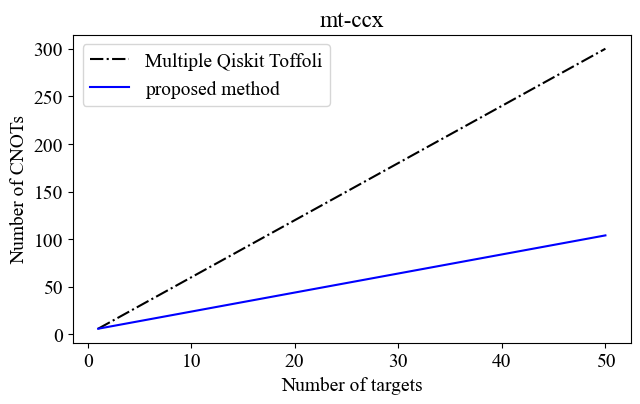

In [33]:
x = np.arange(1, 51)
# Plot the data as a line plot
plt.rcParams["figure.figsize"] = (7.2, 4.0)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 14})

plt.plot(x, qiskit_cnot, 'k-.')
plt.plot(x, new_circuit_cnot, 'b-')

plt.legend(
    ('Multiple Qiskit Toffoli', 'proposed method'),
    loc='upper left', shadow=False
)

# Add labels to the axes and a title to the graph
plt.title('mt-ccx')
plt.xlabel('Number of targets')
plt.ylabel('Number of CNOTs')
plt.savefig('comparacao_toffoli.png', dpi=300, bbox_inches='tight')

# Display the graph
plt.show()